# Reading the dataset

In [69]:
# Importing pandas
import pandas as pd

In [70]:
# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Water_Quality.csv')

In [71]:
# Checking top 5 rows of dataset
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [72]:
# Checking the shape of the dataset
data.shape

(7996, 21)

In [73]:
# Class label count
data['is_safe'].value_counts()

0    7084
1     912
Name: is_safe, dtype: int64

In [74]:
# percentage distribution
data['is_safe'].value_counts(normalize=True)

0    0.885943
1    0.114057
Name: is_safe, dtype: float64

# Defining input output features

In [75]:
# Defining input (X) and output (y) features
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values

In [76]:
# Creating training and test patterns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle=True, random_state = 0)

In [77]:
# Checking shape of training and test sets
X_train.shape, X_test.shape

((5597, 20), (2399, 20))

In [78]:
# input patterns
X_train

array([[1.300e-01, 9.340e+00, 4.000e-02, ..., 1.000e-02, 4.100e-01,
        7.000e-02],
       [3.610e+00, 1.891e+01, 2.000e-02, ..., 8.000e-02, 4.600e-01,
        2.000e-02],
       [3.000e-02, 1.325e+01, 8.000e-02, ..., 5.000e-02, 9.000e-02,
        8.000e-02],
       ...,
       [2.380e+00, 1.613e+01, 3.300e-01, ..., 9.000e-02, 2.800e-01,
        8.000e-02],
       [3.000e-02, 1.891e+01, 2.000e-02, ..., 8.000e-02, 4.600e-01,
        2.000e-02],
       [1.500e-01, 1.042e+01, 5.000e-02, ..., 3.000e-02, 6.000e-02,
        4.000e-02]])

# Installing XGBoost 

In [79]:
# install the package
! pip install xgboost

# Initializing and training Extremely Gradient Boosting Classifier

In [80]:
# Defining the Classifier
from xgboost import XGBClassifier
classifier = XGBClassifier(n_estimators = 1000, max_depth =10, learning_rate = 0.1)

In [81]:
# Training the XGBC classifier
classifier.fit(X_train, y_train)

XGBClassifier(max_depth=10, n_estimators=1000)

# Predecting and Evaluating the classifier

In [82]:
# Making predictions with the test data
y_pred = classifier.predict(X_test)

In [83]:
# Combining the actual and predicted values
pd.DataFrame(data={'Actual Labels': y_test, 'Predicted Labels': y_pred}).head()

,Actual Labels,Predicted Labels
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


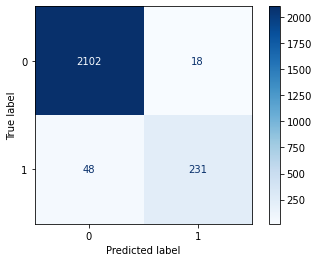

In [84]:
# Confusuion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test, cmap='Blues')

In [85]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.972488536890371

In [86]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2120
           1       0.93      0.83      0.87       279

    accuracy                           0.97      2399
   macro avg       0.95      0.91      0.93      2399
weighted avg       0.97      0.97      0.97      2399

